In [5]:
import os
from functools import partial
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyro
import pyro.distributions as dist

# for CI testing
smoke_test = ('CI' in os.environ)
# assert pyro.__version__.startswith('1.5.0')
pyro.enable_validation(True)
pyro.set_rng_seed(1)
pyro.enable_validation(True)


# Set matplotlib settings
%matplotlib inline
plt.style.use('default')
from torch import nn
from pyro.nn import PyroModule

assert issubclass(PyroModule[nn.Linear], nn.Linear)
assert issubclass(PyroModule[nn.Linear], PyroModule)

from data_generation import generate_data, split_train_target_test_covariate_shift, plot_data

True function is linear and weight is: 0.2669 and true bias is 6.614, true sigma is 0.4


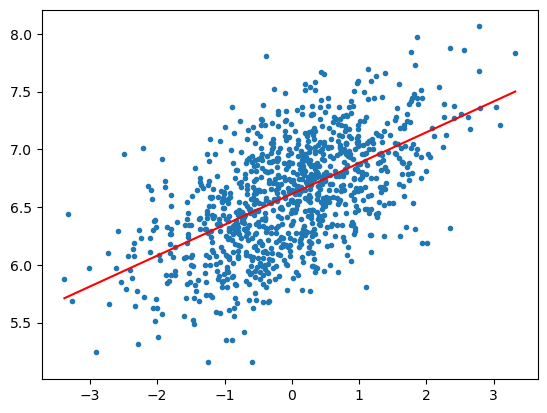

In [6]:
#toy data


N=1000
sine = False
categories = False
noise_variation = 0.4
noise_variation_2 = 0.99
data = generate_data(N=N, noise_variation = noise_variation, sine=sine,categories=categories , category_2_noise_variation=noise_variation_2)
X,Y, b=  data["predictors"], data["target"],data["bias"]

w = data["weight"] if not sine else None
if categories:
    category_threshold ,indices = data["category_threshold"], data["indices"]
else:
    category_threshold ,indices = (None, None)

plot_data(X,Y,w,b, sine=sine, indices=indices, category_threshold=category_threshold)
        
# if categ

# torch.manual_seed(0)

if sine:  
    train_X, train_Y, target_X, target_Y, test_X, test_Y = split_train_target_test_covariate_shift(X,Y)


